# Crop yield analysis and prediction


Crop yield analysis and prediction for Indian states entail employing a blend of traditional agricultural knowledge and cutting-edge technology. By integrating historical data, soil quality assessments, weather forecasts, and satellite imagery, experts can forecast crop yields with greater precision. This predictive analysis is instrumental in helping farmers make informed decisions about crop selection, planting schedules, and resource management, ultimately enhancing agricultural productivity and sustainability. Additionally, policymakers can utilize these insights to develop targeted interventions and support mechanisms to bolster food security and rural livelihoods across various Indian states.





In [1]:
##collecting and cleaning of data


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df_yield =pd.read_csv('C:/Users/KUNWA/Desktop/jp/ttt/in_crop_yield.csv')

In [4]:
df_yield.shape

(19689, 10)

In [5]:
df_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [6]:
df_yield.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [7]:
df_yield = df_yield.rename(index=str, columns={"Production": 'hg/ha_yield',"Annual_Rainfall":'avg_annual_rainfall_in_mm'})


In [8]:
df_yield.head()

,Crop,Crop_Year,Season,State,Area,hg/ha_yield,avg_annual_rainfall_in_mm,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [9]:
#dropping the season column
df_yield=df_yield.drop(['Season','Yield'],axis=1)


In [10]:
df_yield.head()

,Crop,Crop_Year,State,Area,hg/ha_yield,avg_annual_rainfall_in_mm,Fertilizer,Pesticide
0,Arecanut,1997,Assam,73814.0,56708,2051.4,7024878.38,22882.34
1,Arhar/Tur,1997,Assam,6637.0,4685,2051.4,631643.29,2057.47
2,Castor seed,1997,Assam,796.0,22,2051.4,75755.32,246.76
3,Coconut,1997,Assam,19656.0,126905000,2051.4,1870661.52,6093.36
4,Cotton(lint),1997,Assam,1739.0,794,2051.4,165500.63,539.09


In [11]:
df_yield.columns

Index(['Crop', 'Crop_Year', 'State', 'Area', 'hg/ha_yield',
       'avg_annual_rainfall_in_mm', 'Fertilizer', 'Pesticide'],
      dtype='object')

In [12]:
# to shift hg/ha _yield in last column as target value or feature
col= ['Crop_Year', 'avg_annual_rainfall_in_mm', 'Pesticide',
       'Fertilizer','State', 'Area', 'Crop', 'hg/ha_yield']
df_yield=df_yield[col]

In [13]:
df_yield.head()

,Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,Crop,hg/ha_yield
0,1997,2051.4,22882.34,7024878.38,Assam,73814.0,Arecanut,56708
1,1997,2051.4,2057.47,631643.29,Assam,6637.0,Arhar/Tur,4685
2,1997,2051.4,246.76,75755.32,Assam,796.0,Castor seed,22
3,1997,2051.4,6093.36,1870661.52,Assam,19656.0,Coconut,126905000
4,1997,2051.4,539.09,165500.63,Assam,1739.0,Cotton(lint),794


In [14]:
df_yield.isnull().sum()

Crop_Year                    0
avg_annual_rainfall_in_mm    0
Pesticide                    0
Fertilizer                   0
State                        0
Area                         0
Crop                         0
hg/ha_yield                  0
dtype: int64

no empty values

In [15]:
df_yield.duplicated().sum()

20

In [16]:
df_yield.drop_duplicates(inplace=True)

In [17]:
df_yield.duplicated().sum()

0

In [18]:
df_yield.shape

(19669, 8)


# Data exploration

In [19]:
df_yield.groupby('Crop').count()

,Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,hg/ha_yield
Crop,,,,,,,
Arecanut,161,161,161,161,161,161,161
Arhar/Tur,508,508,508,508,508,508,508
Bajra,524,524,524,524,524,524,524
Banana,245,245,245,245,245,245,245
Barley,297,297,297,297,297,297,297
Black pepper,126,126,126,126,126,126,126
Cardamom,74,74,74,74,74,74,74
Cashewnut,134,134,134,134,134,134,134
Castor seed,300,300,300,300,300,300,300


In [20]:
df_yield.describe()

,Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,Area,hg/ha_yield
count,19669.000000,19669.000000,1.966900e+04,1.966900e+04,1.966900e+04,1.966900e+04
mean,2009.128730,1437.628813,4.889733e+04,2.412726e+07,1.801057e+05,1.645265e+07
std,6.498533,816.905210,2.133902e+05,9.499127e+07,7.331795e+05,2.631900e+08
min,1997.000000,301.300000,9.000000e-02,5.417000e+01,5.000000e-01,0.000000e+00
25%,2004.000000,940.700000,3.587200e+02,1.893400e+05,1.398000e+03,1.400000e+03
50%,2010.000000,1247.000000,2.429250e+03,1.239514e+06,9.347000e+03,1.384600e+04
75%,2015.000000,1643.700000,2.008856e+04,1.002795e+07,7.523600e+04,1.230000e+05
max,2020.000000,6552.700000,1.575051e+07,4.835407e+09,5.080810e+07,6.326000e+09


In [21]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19669 entries, 0 to 19688
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop_Year                  19669 non-null  int64  
 1   avg_annual_rainfall_in_mm  19669 non-null  float64
 2   Pesticide                  19669 non-null  float64
 3   Fertilizer                 19669 non-null  float64
 4   State                      19669 non-null  object 
 5   Area                       19669 non-null  float64
 6   Crop                       19669 non-null  object 
 7   hg/ha_yield                19669 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [22]:
# data visualisation
df_yield['State'].nunique()

30

the dataframe has 30 states,ordering by 10 ,the highest yield production:

In [23]:
len(df_yield['Crop'].unique())

55

55 different crops are producing in majority across india 

In [24]:
df_yield.groupby(['State'],sort=True)['hg/ha_yield'].sum().nlargest(10)

State
Kerala            129700649755
Tamil Nadu         78051759253
Karnataka          63772797366
Andhra Pradesh     26076218605
West Bengal         8941179120
Uttar Pradesh       4442585302
Assam               3637714928
Goa                 2193998349
Maharashtra         1878564915
Madhya Pradesh       834490323
Name: hg/ha_yield, dtype: int64

kerela has the highest yield production

In [25]:
df_yield.groupby(['Crop','State'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Crop       State         
Coconut    Kerala            129607125000
           Tamil Nadu         77024400000
           Karnataka          62692166000
           Andhra Pradesh     25212327031
           West Bengal         8068332400
           Assam               3455431000
Sugarcane  Uttar Pradesh       3062485896
Coconut    Goa                 2188980000
Sugarcane  Maharashtra         1396763558
           Karnataka            695356190
Name: hg/ha_yield, dtype: int64

hence acc. to data coconut is highly produced in kerela,tamilnadu,karnataka ,following with andhra and bengal.

and sugarcane largely produced in uttarpradesh.

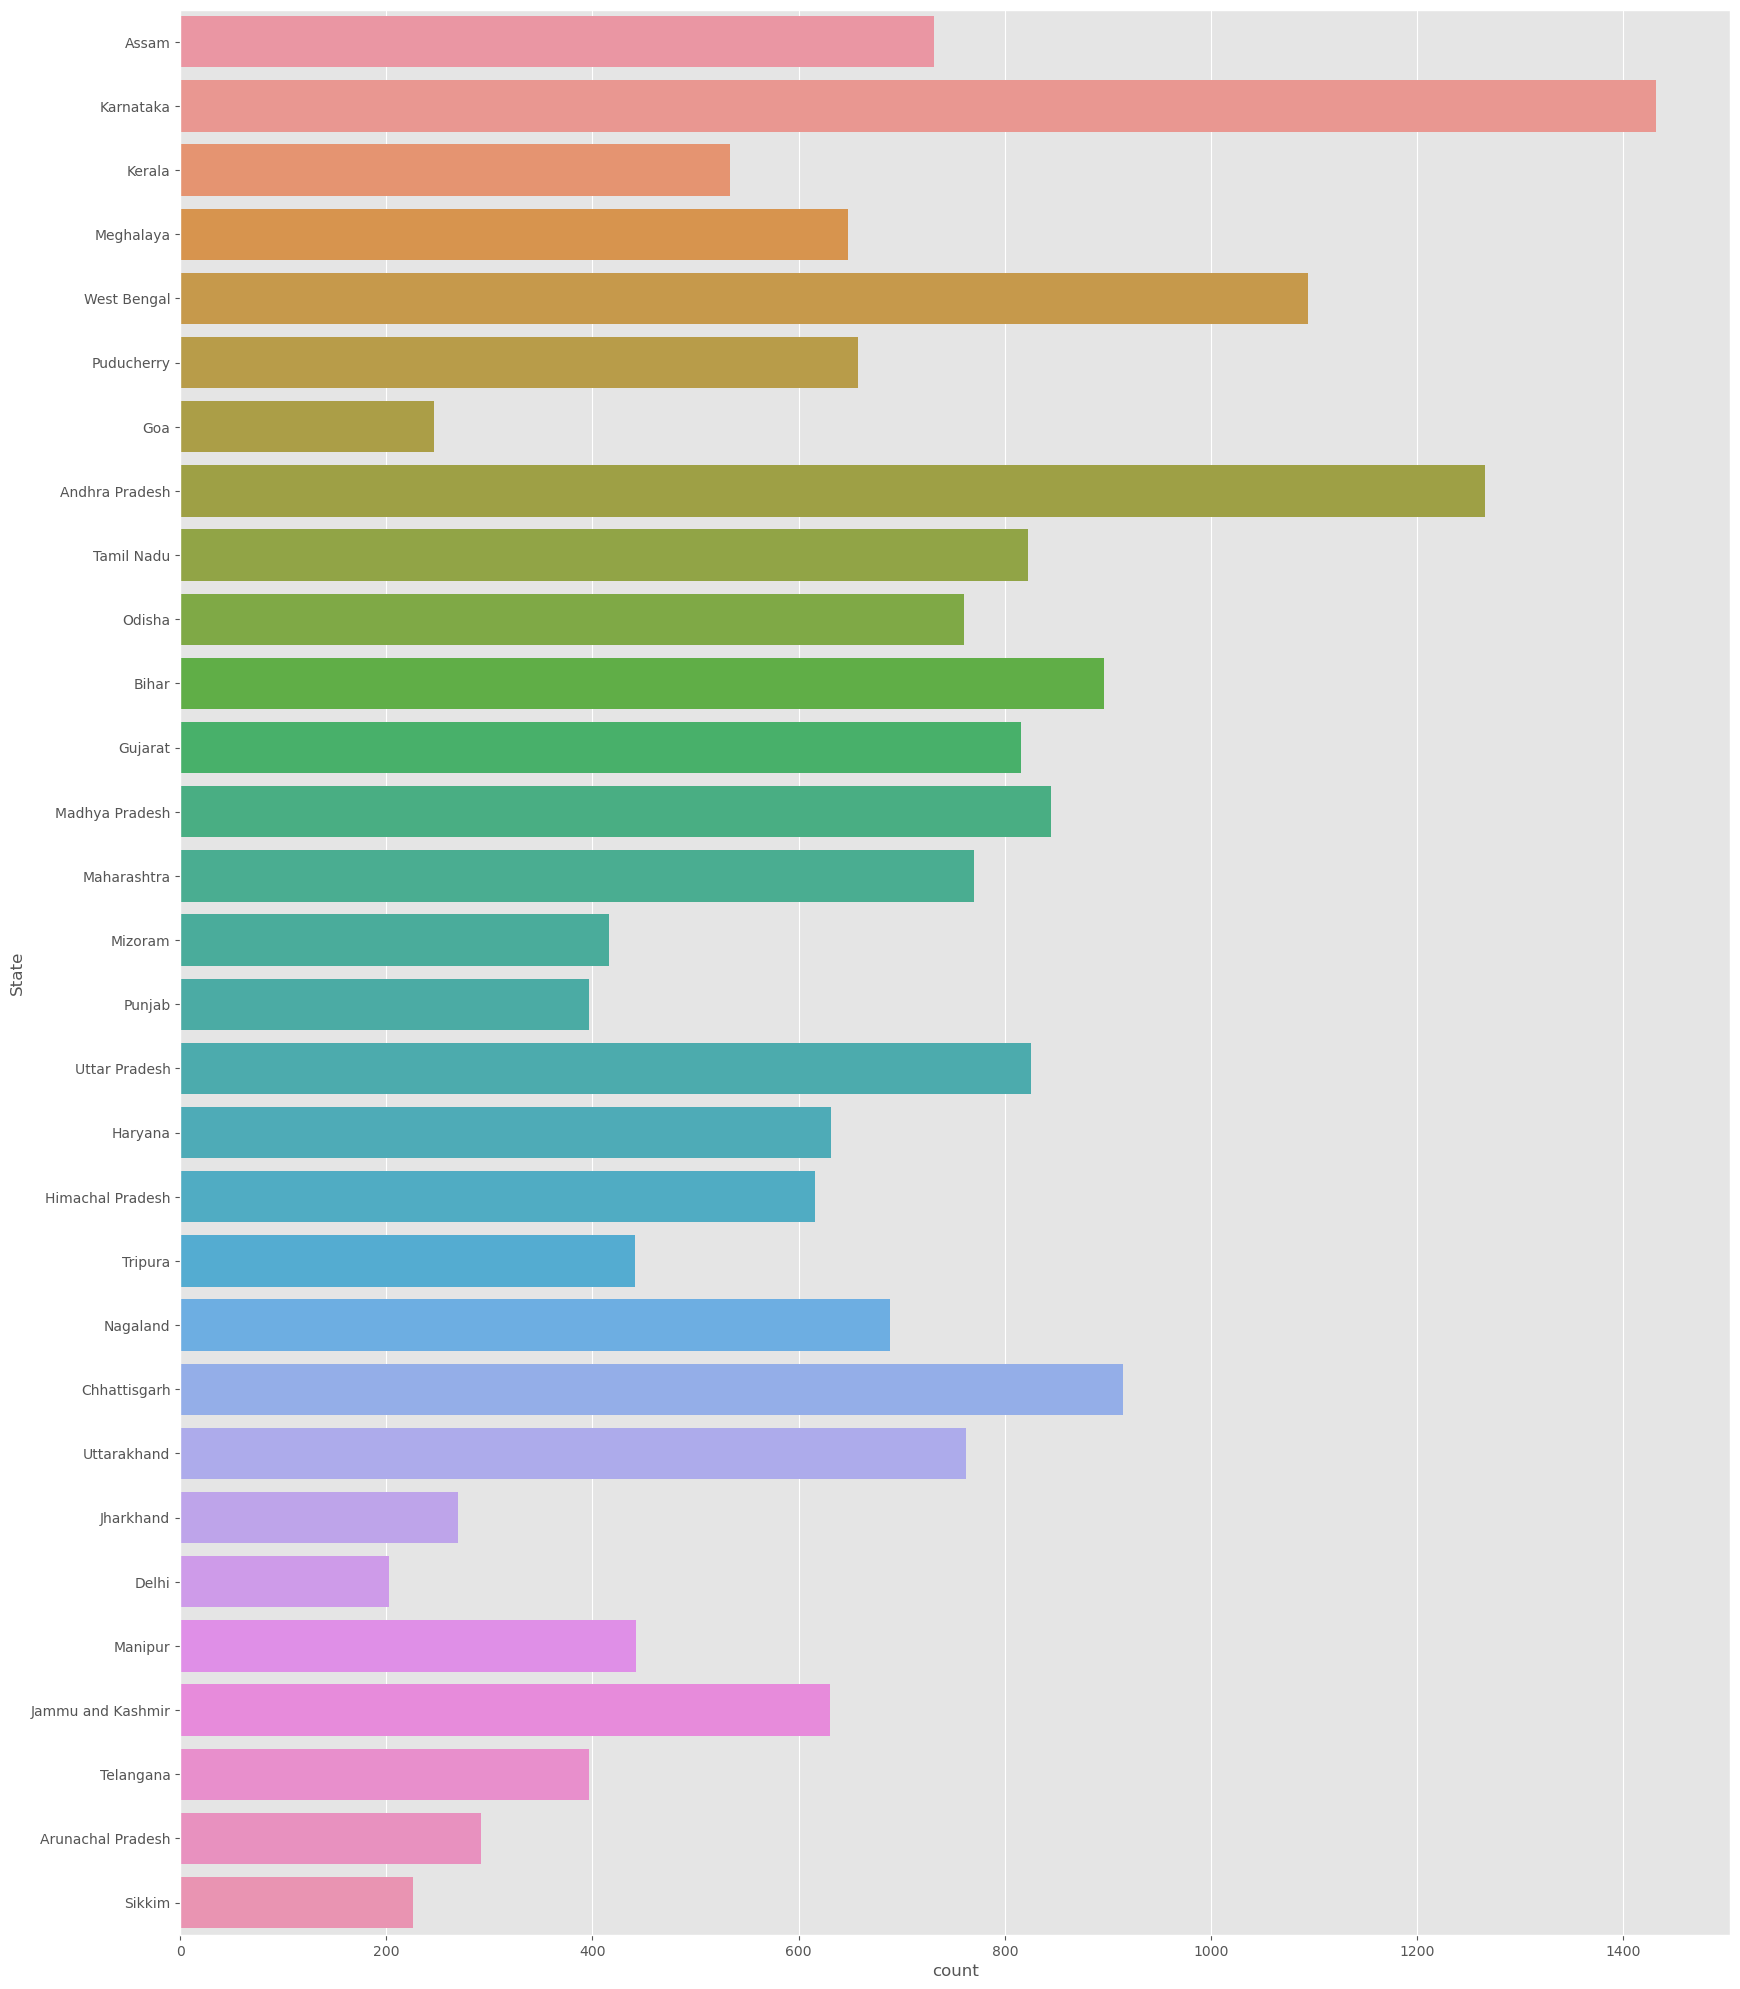

In [26]:
plt.figure(figsize=(20,25))
sns.countplot(y=df_yield['State'])
plt.show()

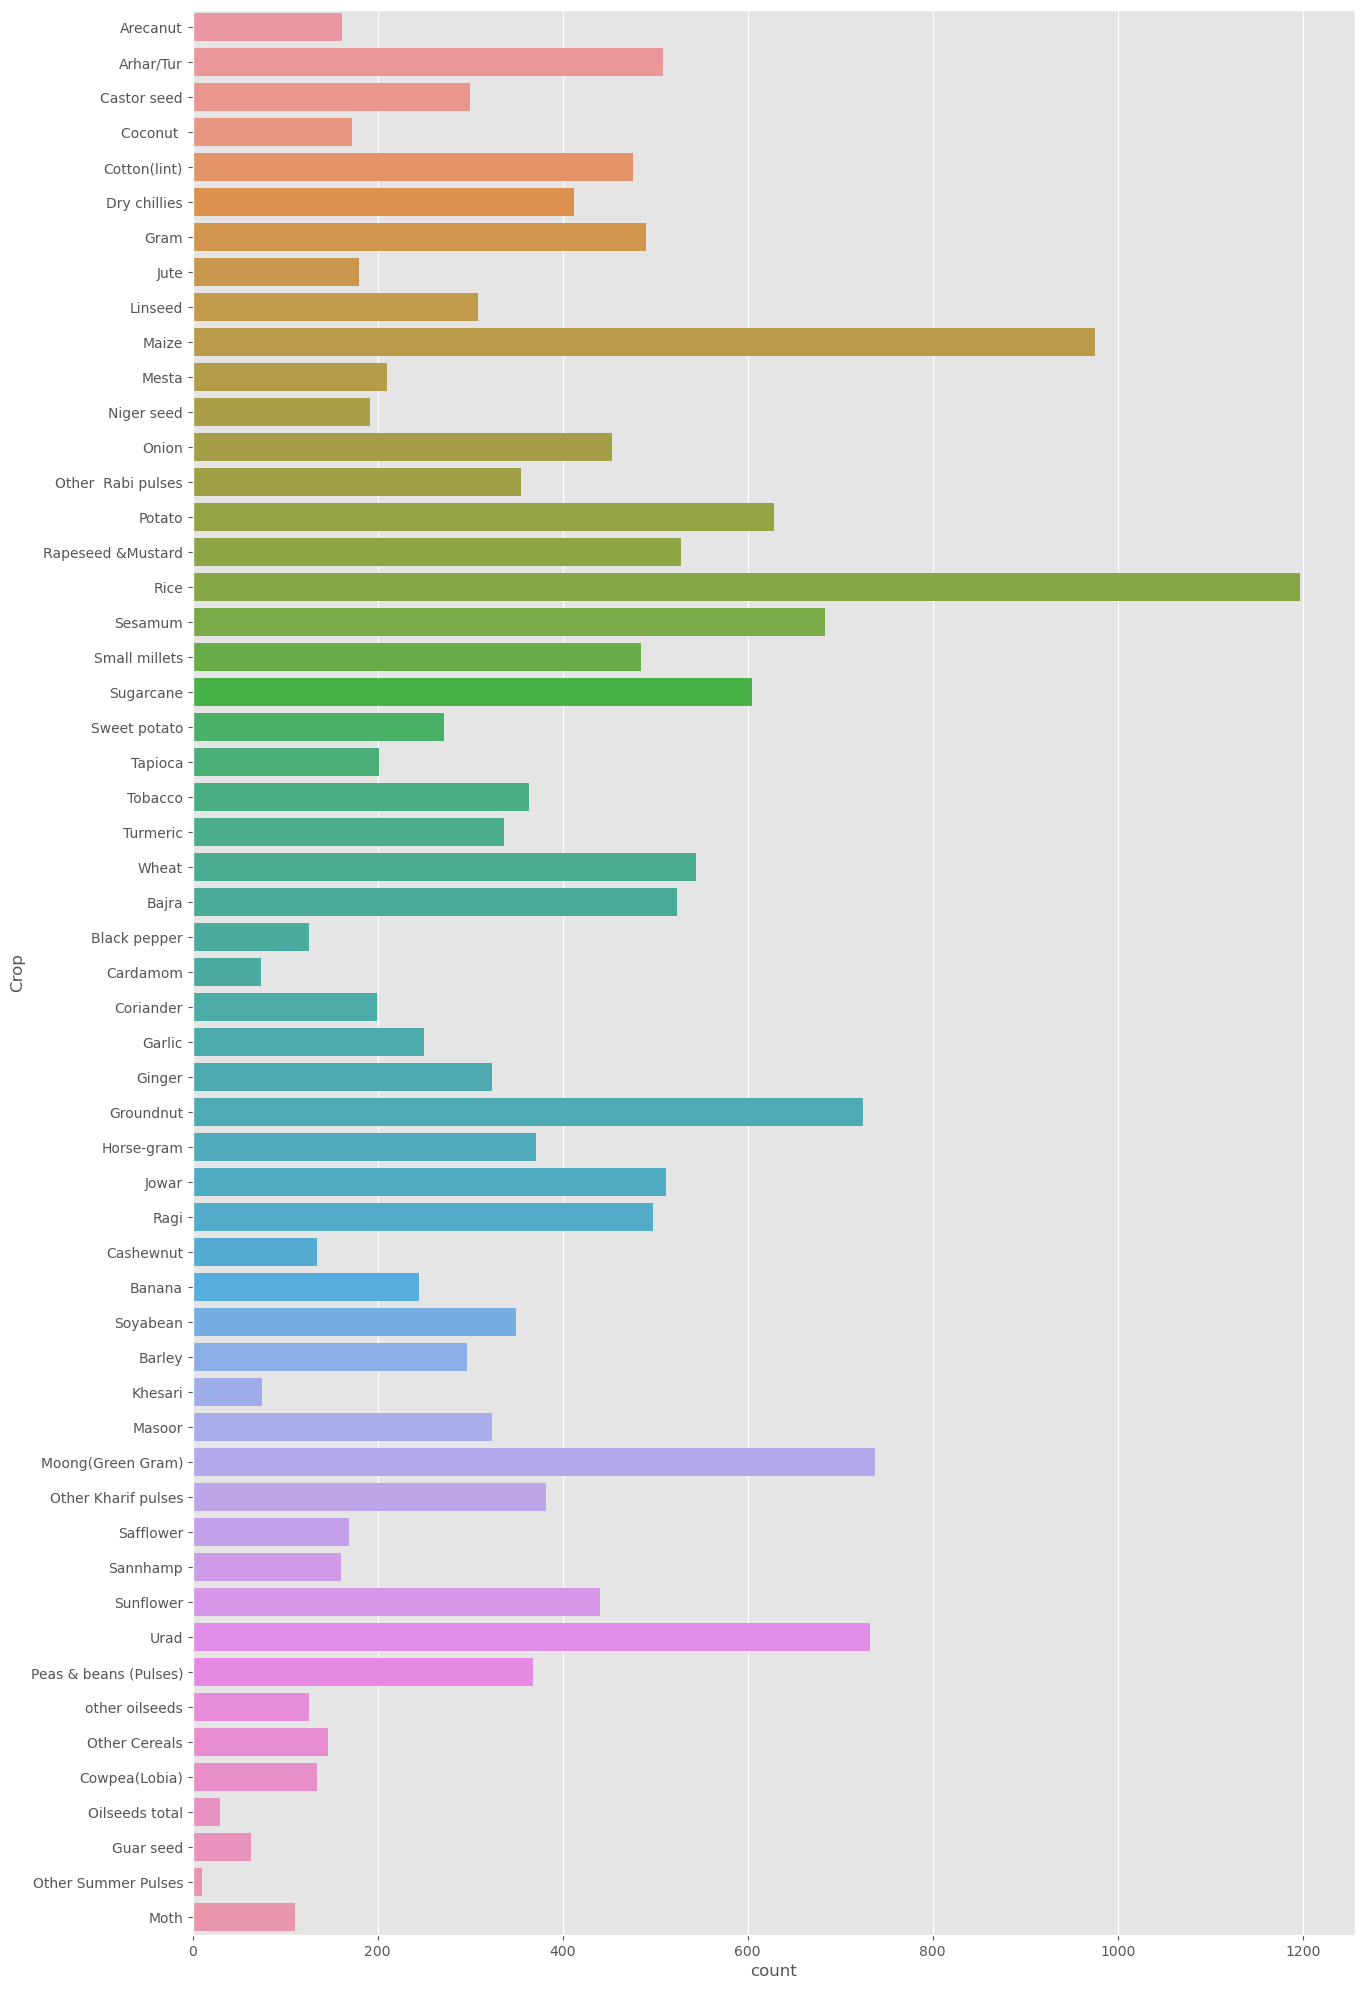

In [27]:
plt.figure (figsize=(15,25))
sns.countplot(y=df_yield['Crop'])
plt.show()

In [28]:
(df_yield['State'].value_counts()< 400).sum()

7

In [29]:
_state=df_yield['State'].unique()
yield_per_state=[]
for st in _state:
    yield_per_state.append(df_yield[df_yield['State']==st]['hg/ha_yield'].sum())
    

In [30]:
df_yield['hg/ha_yield'].sum()

323607125779

In [31]:
yield_per_state

[3637714928,
 63772797366,
 129700649755,
 16500457,
 8941179120,
 493811914,
 2193998349,
 26076218605,
 78051759253,
 194080325,
 544953534,
 807480178,
 834490323,
 1878564915,
 2769208,
 781551409,
 4442585302,
 589739640,
 32297151,
 16952054,
 18748702,
 143096606,
 179697340,
 43793850,
 2666022,
 18764185,
 30298317,
 147700034,
 9522010,
 2744927]

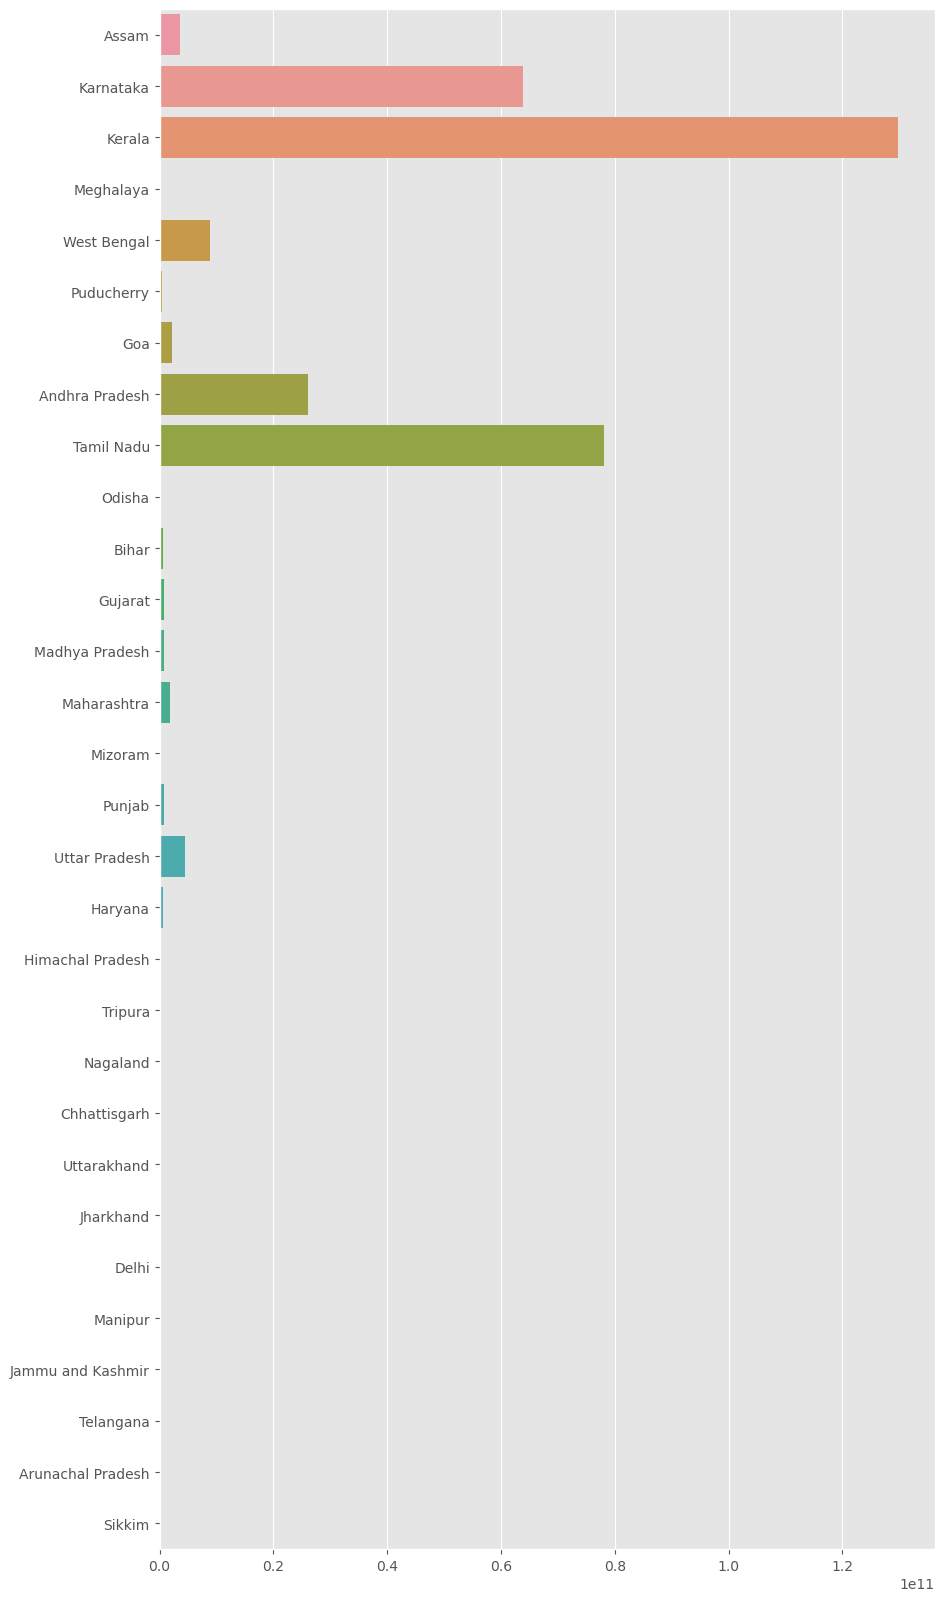

In [32]:
plt.figure(figsize=(10,20))
sns.barplot(y=_state,x=yield_per_state)
plt.show()

In [33]:
crops=df_yield['Crop'].unique()
area_per_crop=[]
for crp in crops:
    area_per_crop.append(df_yield[df_yield['Crop']==crp]['Area'].sum())

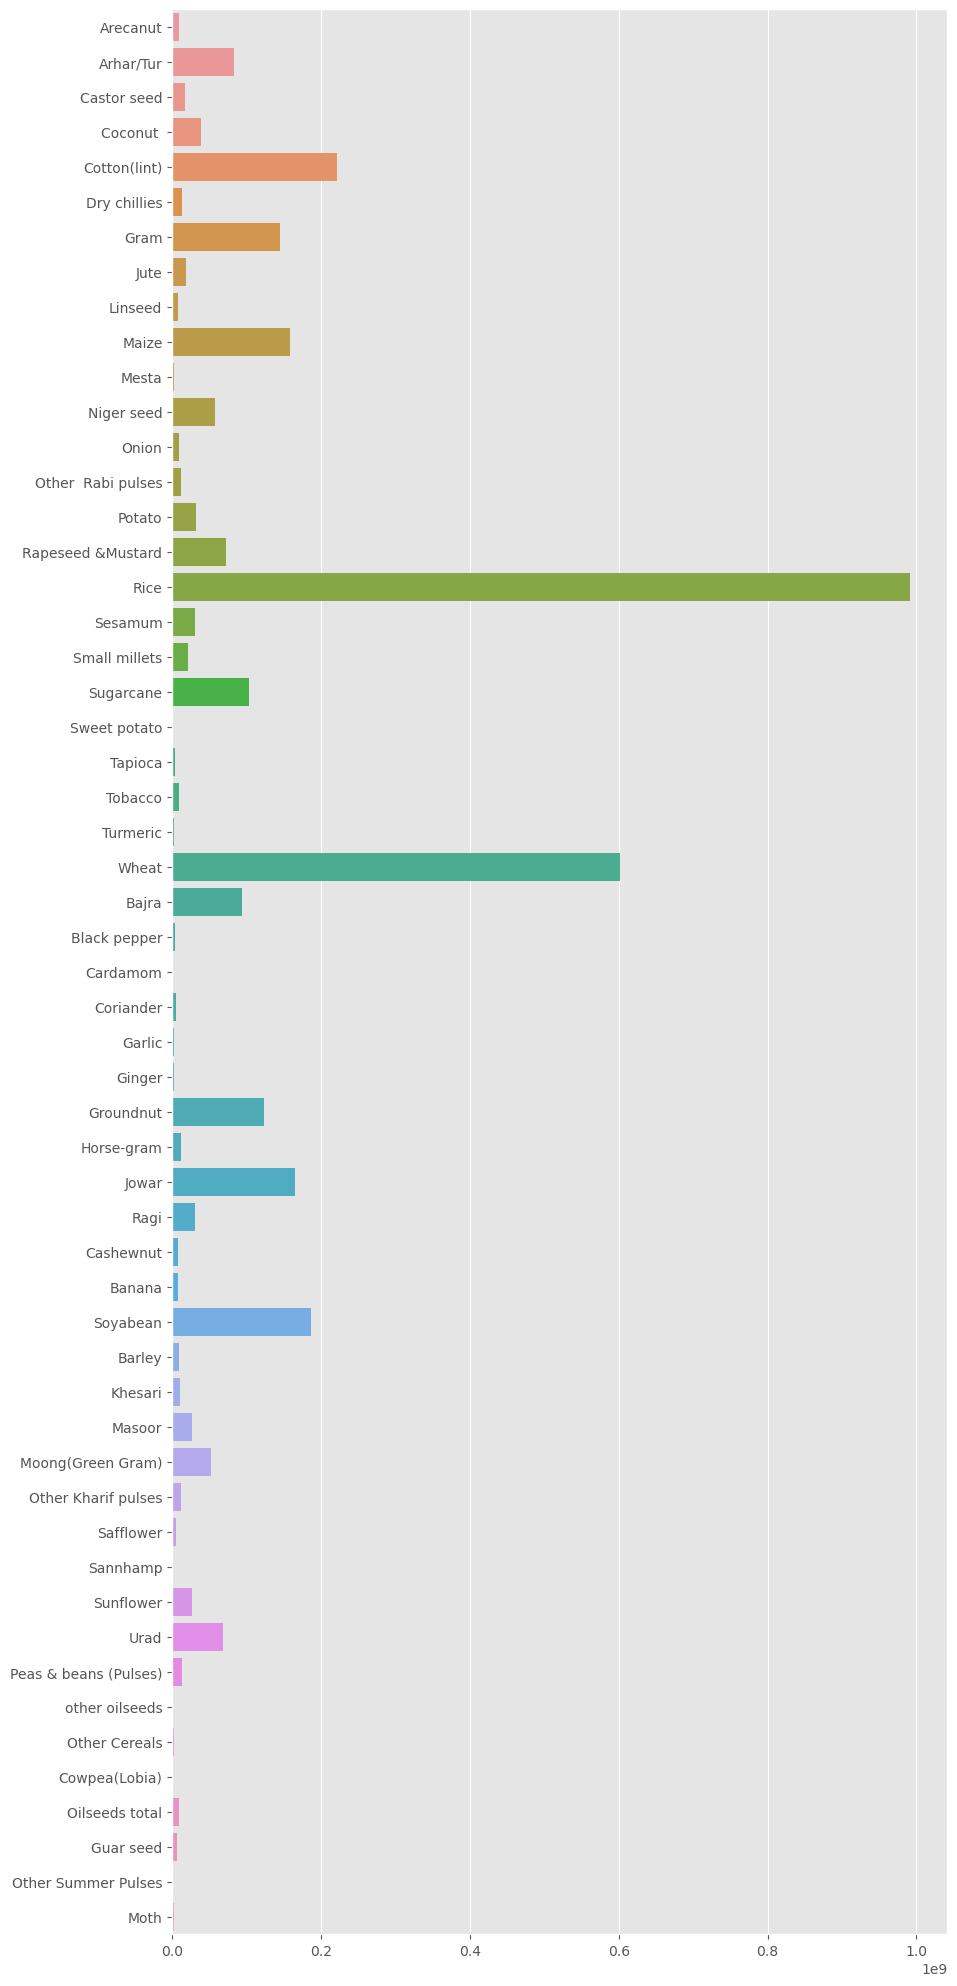

In [34]:
plt.figure(figsize=(10,25))
sns.barplot(y=crops,x=area_per_crop)
plt.show()

In [35]:
df_yield.head()

,Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,Crop,hg/ha_yield
0,1997,2051.4,22882.34,7024878.38,Assam,73814.0,Arecanut,56708
1,1997,2051.4,2057.47,631643.29,Assam,6637.0,Arhar/Tur,4685
2,1997,2051.4,246.76,75755.32,Assam,796.0,Castor seed,22
3,1997,2051.4,6093.36,1870661.52,Assam,19656.0,Coconut,126905000
4,1997,2051.4,539.09,165500.63,Assam,1739.0,Cotton(lint),794


In [36]:
x=df_yield.drop('hg/ha_yield',axis=1)
y=df_yield['hg/ha_yield']


In [37]:
x.shape

(19669, 7)

In [38]:
y.shape

(19669,)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

onehe=OneHotEncoder(drop='first')
scale=StandardScaler()

preprocessor =ColumnTransformer(
    transformers=[
        ('StandardScalar',scale,[0,1,2,3,5]),
        ('OneHotEncoder',onehe,[4,6])
    ],
    remainder='passthrough'

)

In [41]:
x_train_dumy=preprocessor.fit_transform(x_train)
x_test_dumy=preprocessor.fit_transform(x_test)

In [42]:
preprocessor.get_feature_names_out(col[:-1])

array(['StandardScalar__Crop_Year',
       'StandardScalar__avg_annual_rainfall_in_mm',
       'StandardScalar__Pesticide', 'StandardScalar__Fertilizer',
       'StandardScalar__Area', 'OneHotEncoder__State_Arunachal Pradesh',
       'OneHotEncoder__State_Assam', 'OneHotEncoder__State_Bihar',
       'OneHotEncoder__State_Chhattisgarh', 'OneHotEncoder__State_Delhi',
       'OneHotEncoder__State_Goa', 'OneHotEncoder__State_Gujarat',
       'OneHotEncoder__State_Haryana',
       'OneHotEncoder__State_Himachal Pradesh',
       'OneHotEncoder__State_Jammu and Kashmir',
       'OneHotEncoder__State_Jharkhand', 'OneHotEncoder__State_Karnataka',
       'OneHotEncoder__State_Kerala',
       'OneHotEncoder__State_Madhya Pradesh',
       'OneHotEncoder__State_Maharashtra', 'OneHotEncoder__State_Manipur',
       'OneHotEncoder__State_Meghalaya', 'OneHotEncoder__State_Mizoram',
       'OneHotEncoder__State_Nagaland', 'OneHotEncoder__State_Odisha',
       'OneHotEncoder__State_Puducherry', 'OneHotEn

In [43]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score

In [44]:
models={
    'Linear Regression ':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor(),
    "Ridge":Ridge(),
}
for name,mod in models.items():
    mod.fit(x_train_dumy,y_train)
    y_predt=mod.predict(x_test_dumy)
    print(f"{name}:mae:{mean_absolute_error(y_test,y_predt)} score: {r2_score(y_test,y_predt)}")


Linear Regression :mae:37331427.22917508 score: 0.4552012380307713
Decision Tree:mae:2546397.5851550587 score: 0.9832855977702142
KNN:mae:2274372.110167768 score: 0.9749577604319477
Ridge:mae:37225647.56807263 score: 0.4539674305502073


In [45]:
dtre=DecisionTreeRegressor()
dtre.fit(x_train_dumy,y_train)
dtre.predict(x_test_dumy)

array([8.689200e+04, 2.119990e+05, 1.000000e+00, ..., 3.000000e+00,
       6.833175e+06, 0.000000e+00])

In [46]:
df_yield.columns

Index(['Crop_Year', 'avg_annual_rainfall_in_mm', 'Pesticide', 'Fertilizer',
       'State', 'Area', 'Crop', 'hg/ha_yield'],
      dtype='object')

In [47]:
df_yield.head()

,Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,Crop,hg/ha_yield
0,1997,2051.4,22882.34,7024878.38,Assam,73814.0,Arecanut,56708
1,1997,2051.4,2057.47,631643.29,Assam,6637.0,Arhar/Tur,4685
2,1997,2051.4,246.76,75755.32,Assam,796.0,Castor seed,22
3,1997,2051.4,6093.36,1870661.52,Assam,19656.0,Coconut,126905000
4,1997,2051.4,539.09,165500.63,Assam,1739.0,Cotton(lint),794


## prediction sys.

In [48]:
# for saving the model in preprocessor.pkl file and use it for testing and prediction purpose

import pickle
pickle_filename = 'preprocessor.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(preprocessor, file)

print(f"Model is saved to {pickle_filename}")

Model is saved to preprocessor.pkl


In [49]:
def prediction(Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,Crop):
    features=np.array([[Crop_Year,avg_annual_rainfall_in_mm,Pesticide,Fertilizer,State,Area,Crop]],dtype=object)
    transform_features=preprocessor.transform(features)
    predicted_yield=dtre.predict(transform_features).reshape(-1,1)
    return predicted_yield[0][0]
    

In [50]:
result=prediction(1997,2051.4,22882.34,7024878.38,'Assam',73814.0,'Arecanut')

C:\Users\KUNWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\KUNWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [51]:
print(f"predicted yield is {result} in hg/ha ")

predicted yield is 51500.0 in hg/ha 
